In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
#do a little bit of data cleaning
df = pd.read_csv("H:/Datasets/ML/OnlineNews/OnlineNewsPopularity/OnlineNewsPopularity.csv")

In [17]:
#kick url and timedelta (they are not predictive) and make shares a boolean variable
from sklearn.model_selection import train_test_split
y = df[' shares']
df = df.drop(' shares', axis = 1)
df = df.drop('url', axis = 1)
df = df.drop(' timedelta', axis = 1)

In [18]:
#make boolean variable
threshold = 2000
y.loc[y <= threshold] = 0
y.loc[y > threshold] = 1

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 1/3, random_state = 42)

In [27]:
#Find the best parameters for C and gamma
from sklearn.model_selection import GridSearchCV
clf = make_pipeline(StandardScaler(), SVC(cache_size = 8000,gamma = 'auto'))

In [28]:
''''param_grid = {'svc__C': [1,5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(clf, param_grid)
%time grid.fit(X_train, y_train)
print(grid.best_params_)'''

"'param_grid = {'svc__C': [1,5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}\ngrid = GridSearchCV(clf, param_grid)\n%time grid.fit(X_train, y_train)\nprint(grid.best_params_)"

In [29]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(cache_size=8000, gamma='auto'))])

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
yfit = clf.predict(X_test)

In [31]:
print(classification_report(y_test,yfit))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      8722
           1       0.61      0.27      0.37      4493

    accuracy                           0.69     13215
   macro avg       0.66      0.59      0.59     13215
weighted avg       0.68      0.69      0.65     13215



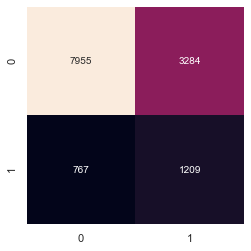

In [32]:
mat = confusion_matrix(y_test,yfit)
sns.heatmap(mat.T, square = True, annot = True, fmt='d',cbar=False)